<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> DXFs </font>
</div>

<div align="center"> 
<font size=5> ejemplos de dibujos </font>
</div>

In [1]:
from diffractio import plt, sp, np

import ezdxf

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

In [3]:
mm=1.
inches = 25.4*mm
um = mm/1000
nm = um/1000
degrees = np.pi/180

In [4]:
dxf_params = dict(

version="R2000",
total_size=4*inches,
num_masks=(4, 4),
line_size=200*um
)

In [5]:
def start_drawing(**dxf_params):
    
    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']
    
    
    dwg = ezdxf.new(version)
    msp = dwg.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size

    return dwg, msp, mask_size

In [6]:
def draw(dwg, msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)

# Draw points

In [7]:
dwg, msp, mask_size = start_drawing(**dxf_params)

xs = np.linspace(0*mm, 1*mm, 11)
ys = np.linspace(0*mm, 1*mm, 11)

for x in xs:
    for y in ys:
        msp.add_point((x, y))



draw(dwg, msp)
dwg.saveas('tests/points.dxf')

## Draw circles

In [8]:
r0=(0*mm, 0*mm)

In [9]:
dwg, msp, mask_size = start_drawing(**dxf_params)

msp.add_circle(center = r0, radius = 1*mm)
msp.add_circle(center = r0, radius = 2*mm)
msp.add_circle(center = r0, radius = 3*mm)
msp.add_circle(center = r0, radius = 4*mm)
msp.add_circle(center = r0, radius = 5*mm)

draw(dwg, msp)
dwg.saveas('tests/circles.dxf')

## Draw Lines

In [10]:
dwg, msp, mask_size = start_drawing(**dxf_params)

msp.add_line((0*mm,0*mm), (0*mm, 5*mm))
msp.add_line((1*mm,0*mm), (1*mm, 5*mm))
msp.add_line((2*mm,0*mm), (2*mm, 5*mm))
msp.add_line((3*mm,0*mm), (3*mm, 5*mm))
msp.add_line((4*mm,0*mm), (4*mm, 5*mm))
msp.add_line((5*mm,0*mm), (5*mm, 5*mm))

msp.add_line((0*mm,0*mm), (5*mm, 0*mm))
msp.add_line((0*mm,1*mm), (5*mm, 1*mm))
msp.add_line((0*mm,2*mm), (5*mm, 2*mm))
msp.add_line((0*mm,3*mm), (5*mm, 3*mm))
msp.add_line((0*mm,4*mm), (5*mm, 4*mm))
msp.add_line((0*mm,5*mm), (5*mm, 5*mm))

draw(dwg, msp)
dwg.saveas('tests/line.dxf')

## polyline

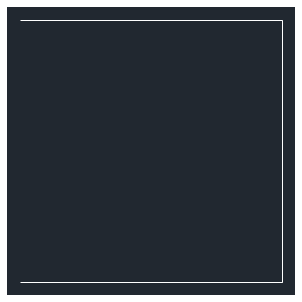

In [11]:
dwg, msp, mask_size = start_drawing(**dxf_params)

size = 2*mm
r0 = (0,0)

points0 = np.array([(-size/2, -size/2), (size/2, -size/2), (size/2, size/2), (-size/2, size/2)])
points0 = points0 + r0 + (size/2, size/2)
      


msp.add_lwpolyline(points0, close=False)

draw(dwg, msp)
dwg.saveas('tests/polyline_not closed.dxf')

In [12]:
dwg, msp, mask_size = start_drawing(**dxf_params)

size = 2*mm
r0 = (0,0)

points0 = np.array([(-size/2, -size/2), (size/2, -size/2), (size/2, size/2), (-size/2, size/2)])
points0 = points0 + r0 + (size/2, size/2)
msp.add_lwpolyline(points0, close=True)

draw(dwg, msp)
dwg.saveas('tests/polyline_closed.dxf')

## Rectangle with polyline

In [13]:
def rectangle_not_rotated(msp, r0: list[float], size: list[float], origin='0'):
    
    x0, y0 = r0
    sx, sy = size
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])
    
    # print(init_point)
    points = np.array([(0,0), (sx,0), (sx,sy), (0,sy)])
    points = points + r0 + init_point
    msp.add_lwpolyline(points, close=True)
    
    return msp

In [70]:
def rotate(point, rotation_point, angle):
    
    x = point[0]-rotation_point[0]
    y = point[1]-rotation_point[1]

    x_new = rotation_point[0] + x*np.cos(angle) - y*np.sin(angle)
    y_new = rotation_point[1] + x*np.sin(angle) + y*np.cos(angle)
    
    print("x,y,xn,yn", x,y, x_new, y_new)

    
    return (x_new, y_new)

In [71]:
dwg, msp, mask_size = start_drawing(**dxf_params)

size = (.1*mm, .2*mm)
r0 = (0,0)

msp = rectangle_not_rotated(msp, r0, size, 'center')
msp = rectangle_not_rotated(msp, r0, size, '0')
msp.add_circle(center = (0,0), radius = .0025*mm)


draw(dwg, msp)
dwg.saveas('tests/rectangle_not_rotated.pdf')

In [81]:
def rectangle_rotated(msp, r0: list[float], size: list[float], angle=0*degrees,  origin='0' , rotation_point=None):
    
    x0, y0 = r0
    sx, sy = size
    
    r0 = np.array(r0)
    
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])

    if rotation_point is None:
        rotation_point = np.array([sx/2, sy/2])
        
    pnr = [(0,0), (sx,0), (sx,sy), (0,sy)]

        
    point_1 = rotate(pnr[0], rotation_point, angle)
    point_2 = rotate(pnr[1], rotation_point, angle)
    point_3 = rotate(pnr[2], rotation_point, angle)
    point_4 = rotate(pnr[3], rotation_point, angle)
    
    points = np.array([point_1, point_2, point_3, point_4])
    points = points + r0 + init_point

    msp.add_lwpolyline(points, close=True)
    
    return msp  


In [82]:

size = (.1*mm, .1*mm)
r0 = (0,0)
angle = 22.5*degrees


pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0 [0 0] [0 0]
x,y,xn,yn -0.05 -0.05 0.0 0.0
x,y,xn,yn 0.05 -0.05 0.1 0.0
x,y,xn,yn 0.05 0.05 0.1 0.1
x,y,xn,yn -0.05 0.05 0.0 0.1
points [[0.  0. ]
 [0.1 0. ]
 [0.1 0.1]
 [0.  0.1]]
____
pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0.39269908169872414 [0 0] [0 0]
x,y,xn,yn -0.05 -0.05 0.022940194992690153 -0.01532814824381883
x,y,xn,yn 0.05 -0.05 0.11532814824381883 0.022940194992690156
x,y,xn,yn 0.05 0.05 0.07705980500730984 0.11532814824381885
x,y,xn,yn -0.05 0.05 -0.01532814824381883 0.07705980500730986
points [[ 0.02294019 -0.01532815]
 [ 0.11532815  0.02294019]
 [ 0.07705981  0.11532815]
 [-0.01532815  0.07705981]]
____


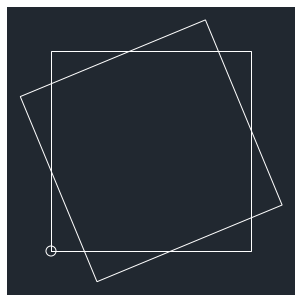

In [83]:

dwg, msp, mask_size = start_drawing(**dxf_params)
msp = rectangle_rotated(msp, r0, size, 0, '0')
msp = rectangle_rotated(msp, r0, size, angle, '0')
msp.add_circle(center = (0,0), radius = .0025*mm)
draw(dwg, msp)

dwg.saveas('tests/rectangle_center_rotated.pdf')


pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0 [0 0] [-0.05 -0.05]
x,y,xn,yn -0.05 -0.05 0.0 0.0
x,y,xn,yn 0.05 -0.05 0.1 0.0
x,y,xn,yn 0.05 0.05 0.1 0.1
x,y,xn,yn -0.05 0.05 0.0 0.1
points [[-0.05 -0.05]
 [ 0.05 -0.05]
 [ 0.05  0.05]
 [-0.05  0.05]]
____
pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0.39269908169872414 [0 0] [-0.05 -0.05]
x,y,xn,yn -0.05 -0.05 0.022940194992690153 -0.01532814824381883
x,y,xn,yn 0.05 -0.05 0.11532814824381883 0.022940194992690156
x,y,xn,yn 0.05 0.05 0.07705980500730984 0.11532814824381885
x,y,xn,yn -0.05 0.05 -0.01532814824381883 0.07705980500730986
points [[-0.02705981 -0.06532815]
 [ 0.06532815 -0.02705981]
 [ 0.02705981  0.06532815]
 [-0.06532815  0.02705981]]
____


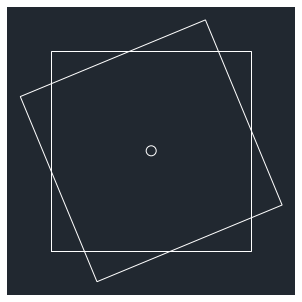

In [84]:

dwg, msp, mask_size = start_drawing(**dxf_params)
msp = rectangle_rotated(msp, r0, size, 0, 'center')
msp = rectangle_rotated(msp, r0, size, angle, 'center')
msp.add_circle(center = (0,0), radius = .0025*mm)
draw(dwg, msp)

dwg.saveas('tests/rectangle_0-0_rotated.pdf')




pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0 [0 0] [0 0]
x,y,xn,yn -0.05 0 0.0 0.0
x,y,xn,yn 0.05 0 0.1 0.0
x,y,xn,yn 0.05 0.1 0.1 0.1
x,y,xn,yn -0.05 0.1 0.0 0.1
points [[0.  0. ]
 [0.1 0. ]
 [0.1 0.1]
 [0.  0.1]]
____
pnr [(0, 0), (0.1, 0), (0.1, 0.1), (0, 0.1)]
0.39269908169872414 [0 0] [0 0]
x,y,xn,yn -0.05 0 0.0038060233744356617 -0.01913417161825449
x,y,xn,yn 0.05 0 0.09619397662556434 0.01913417161825449
x,y,xn,yn 0.05 0.1 0.057925633389055355 0.11152212486938318
x,y,xn,yn -0.05 0.1 -0.03446231986207332 0.07325378163287419
points [[ 0.00380602 -0.01913417]
 [ 0.09619398  0.01913417]
 [ 0.05792563  0.11152212]
 [-0.03446232  0.07325378]]
____


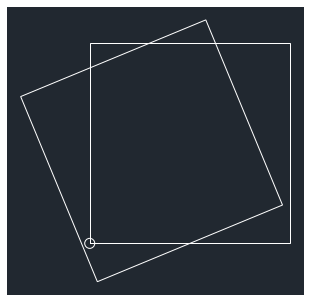

In [87]:

dwg, msp, mask_size = start_drawing(**dxf_params)
msp = rectangle_rotated(msp, r0, size, 0, '0', rotation_point=(0.05,0))
msp = rectangle_rotated(msp, r0, size, angle, '0', rotation_point=(0.05,0))
msp.add_circle(center = (0,0), radius = .0025*mm)
draw(dwg, msp)

dwg.saveas('tests/rectangle_0-0_rotated.pdf')

# Texto

findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.


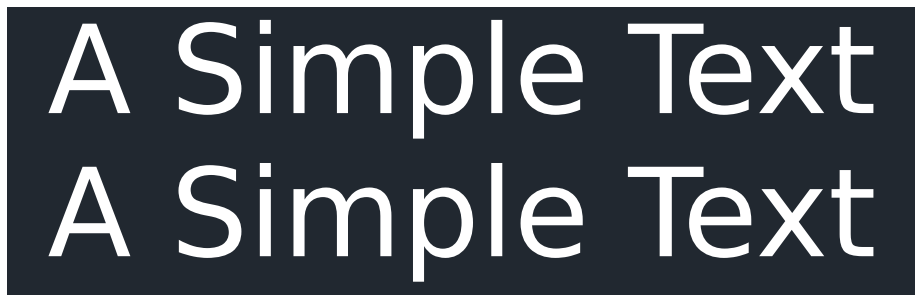

In [18]:
import ezdxf
from ezdxf.enums import TextEntityAlignment

dwg, msp, mask_size = start_drawing(**dxf_params)

msp.add_text("A Simple Text").set_placement(
    (0, 4),
    align=TextEntityAlignment.MIDDLE_RIGHT
)


msp.add_text("A Simple Text").set_placement(
    (0,0),
    align=TextEntityAlignment.MIDDLE_RIGHT
)

draw(dwg, msp)
dwg.saveas('tests/text.pdf')

## Elipses

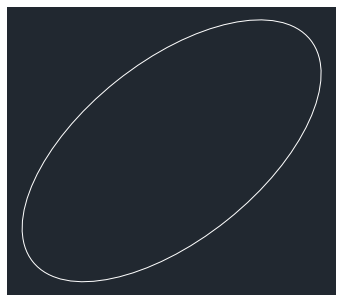

In [19]:
dwg, msp, mask_size = start_drawing(**dxf_params)

size = 2*mm
r0 = (0,0)

ellipse = msp.add_ellipse(
    (10, 10), major_axis=(5, 4), ratio=0.5, start_param=0, 
    end_param=2*np.pi)

draw(dwg, msp)
dwg.saveas('tests/ellipse.dxf')

# Spline

https://ezdxf.readthedocs.io/en/stable/tutorials/spline.html#tut-spline


SPLINE(#2F)


<Figure size 432x288 with 0 Axes>

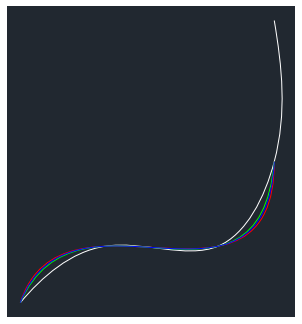

In [20]:

dwg, msp, mask_size = start_drawing(**dxf_params)

fit_points = [(0, 0), (750, 500), (1750, 500), (2250, 1250)]


spline = msp.add_spline(fit_points)

# añadir puntos


msp.add_spline_control_frame(fit_points, method='uniform', dxfattribs={'color': 1})
msp.add_spline_control_frame(fit_points, method='chord', dxfattribs={'color': 3})
msp.add_spline_control_frame(fit_points, method='centripetal', dxfattribs={'color': 5})

spline.fit_points.append((2250, 2500, 0))

plt.figure()
draw(dwg, msp)
dwg.saveas('tests/spline.dxf')

print(spline)

## Curva cerrada

SPLINE(#30)


<Figure size 432x288 with 0 Axes>

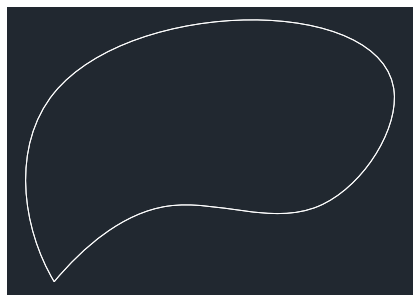

In [21]:

dwg, msp, mask_size = start_drawing(**dxf_params)

fit_points = [(0, 0), (750, 500), (1750, 500), (2250, 1250), (0, 1250),(0, 0)]


spline = msp.add_spline(fit_points)

# añadir puntos
spline = msp.add_cad_spline_control_frame(fit_points)

plt.figure()
draw(dwg, msp)
dwg.saveas('tests/spline2.dxf')

print(spline)

## Esta es suave

SPLINE(#2F)


<Figure size 432x288 with 0 Axes>

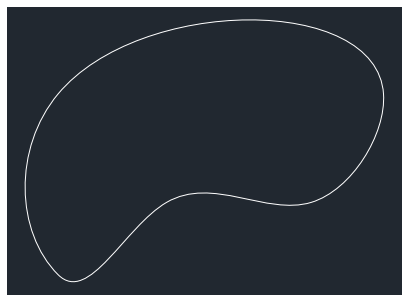

In [22]:
from ezdxf.math import Vec3, estimate_tangents

dwg, msp, mask_size = start_drawing(**dxf_params)

fit_points = [(0, 0), (750, 500), (1750, 500), (2250, 1250), (0, 1250),(0, 0)]

t0= Vec3(1, -1, 0)  # the length (magnitude) of the tangent is not relevant!
spline = msp.add_cad_spline_control_frame(fit_points, tangents=[t0, t0])

plt.figure()
draw(dwg, msp)
dwg.saveas('tests/spline2.dxf')

print(spline)

# Módulo donde se obtienen puntos 

In [23]:
SqVert = ezdxf.render.forms.square(size = 10)

for i in SqVert:
    print(i)

(0.0, 0.0, 0.0)
(10.0, 0.0, 0.0)
(10.0, 10.0, 0.0)
(0.0, 10.0, 0.0)


In [24]:
vertices = ezdxf.render.forms.star(10, r1= 5, r2= 10, rotation = 0.0, elevation = 0.0,
                                  close = True)
 
for i in vertices:
    print(i)

(5.0, 0.0, 0.0)
(9.510565162951535, 3.090169943749474, 0.0)
(4.045084971874737, 2.938926261462366, 0.0)
(5.877852522924732, 8.090169943749475, 0.0)
(1.5450849718747373, 4.755282581475767, 0.0)
(6.123233995736766e-16, 10.0, 0.0)
(-1.5450849718747368, 4.755282581475768, 0.0)
(-5.87785252292473, 8.090169943749475, 0.0)
(-4.045084971874736, 2.9389262614623664, 0.0)
(-9.510565162951535, 3.090169943749475, 0.0)
(-5.0, 6.123233995736766e-16, 0.0)
(-9.510565162951536, -3.0901699437494727, 0.0)
(-4.045084971874738, -2.938926261462365, 0.0)
(-5.877852522924733, -8.090169943749473, 0.0)
(-1.5450849718747377, -4.755282581475767, 0.0)
(-1.8369701987210296e-15, -10.0, 0.0)
(1.5450849718747361, -4.755282581475768, 0.0)
(5.877852522924729, -8.090169943749476, 0.0)
(4.045084971874736, -2.938926261462367, 0.0)
(9.510565162951535, -3.0901699437494767, 0.0)
